# Analyzing DETE and TAFE Exit Surveys

In this project i will work with exits surveys from employees of Deapartment of education, training and employment(DETE) and technical and further education(TAFE) institute of queensland, Australia.


the aim of this project is
1. to know employees who only worked for institute for short period of time reisgning  and employees who have been work longer due to some kind of dissastifaction

2. are younger employees resigning due to some kind of dissatisfaction? and what about older?



# Import dataset and check null values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read the dataset using pandas read_csv
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
#to start analysis, we using df.info() and df.head() to know more about data

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


from dete survey we know that data have 56 columns whith 18 boolean columns, 37 object columns and 1 int columns, and if we see at df.info, there are many of null value, to more focus we will using isnull

In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
dete_survey.shape

(822, 56)

using isnull, we know that many of columns have null value and many of them have 50 % more null values. i will delete column with more than 50 % null values 

In [5]:
# check tafe dataset

tafe_survey.info()
tafe_survey.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


different from dete dataset, tafe have 72 columns with 1 float columns, and 71 object columns

In [6]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [7]:
tafe_survey.shape

(702, 72)

with 702 rows, tafe dataset have column with more than 50 % null values and i will delete it, and for below 50 % (both tafe dan dete dataset) many different strategy will be included

# Delete data with null values

check the data with less than 50 % null values

### dete survey

In [8]:


#dete dataset for non null values for int types
dete_columns = dete_survey.columns

#50 percent data
halfpercent_data = (50/100) * dete_survey.shape[0]

#we will not process column with more 50 %null values, due to it will not give any clue for analyze
#we also don't use data dtypes boolean because they don't have null values and just have 2 classification
for c in dete_columns:
    if (dete_survey[c].isnull().sum() > halfpercent_data) or (dete_survey[c].dtypes == 'int64') or (dete_survey[c].isnull().sum() != 0) or (dete_survey[c].dtypes == 'bool'):
        pass
    else:
        print('\n')
        print('-'*70)
        print(c.upper())
        print(dete_survey[c].value_counts(dropna=False))



----------------------------------------------------------------------
SEPARATIONTYPE
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


----------------------------------------------------------------------
CEASE DATE
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
08/2012         2
04/2014         2
07/2014         2
02/2014         2
2014            1
2010            1
07/2006         1
09/2010         1
1

In [9]:
#for columns with null values and int dtypes
dete_columns = dete_survey.columns

halfpercent_data = (50/100) * dete_survey.shape[0]

for c in dete_columns:
    if (dete_survey[c].isnull().sum() > halfpercent_data) or (dete_survey[c].dtypes == 'int64') or (dete_survey[c].isnull().sum() == 0) or (dete_survey[c].dtypes == 'bool'):
        pass
    else:
        print('\n')
        print('-'*70)
        print(c.upper())
        print(dete_survey[c].value_counts(dropna=False))



----------------------------------------------------------------------
POSITION
Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
NaN                                                          5
Deputy Principal                    

for date dataset there was many conclussion

1. many dataset have 'Not Stated' which is have same values as Nan, so we will change it,

2. many dataset column, such as date dataset, have outlier that should be change it, and also many dataset in date dataset, have different format, so we must concern about it

3. many columns have same value,  professional development and opportunities , so it can be easy to solve solve nan value problem

### tafe survey

In [10]:
#tafe dataset for non null values
tafe_columns = tafe_survey.columns

halfpercent_data = (50/100) * tafe_survey.shape[0]
#we will not process column with more 50 %null values, due to it will not give any clue for analyze
#we also don't use data dtypes boolean because they don't have null values and just have 2 classification
for c in tafe_columns:
    if (tafe_survey[c].isnull().sum() > halfpercent_data) or (tafe_survey[c].dtypes == 'float64') or (tafe_survey[c].isnull().sum() != 0) or (tafe_survey[c].dtypes == 'bool'):
        pass
    else:
        print('\n')
        print('-'*70)
        print(c.upper())
        print(tafe_survey[c].value_counts(dropna=False))



----------------------------------------------------------------------
INSTITUTE
Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: Institute, dtype: int64


----------------------------------------------------------------------
WORKAREA
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64


In [11]:
#tafe dataset for columns with  null values
tafe_columns = tafe_survey.columns

halfpercent_data = (50/100) * tafe_survey.shape[0]
#we will not process column with more 50 %null values, due to it will not give any clue for analyze
#we also don't use data dtypes boolean because they don't have null values and just have 2 classification
for c in tafe_columns:
    if (tafe_survey[c].isnull().sum() > halfpercent_data) or (tafe_survey[c].dtypes == 'float64') or (tafe_survey[c].isnull().sum() == 0) or (tafe_survey[c].dtypes == 'bool'):
        pass
    else:
        print('\n')
        print('-'*70)
        print(c.upper())
        print(tafe_survey[c].value_counts(dropna=False))



----------------------------------------------------------------------
REASON FOR CEASING EMPLOYMENT
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64


----------------------------------------------------------------------
CONTRIBUTING FACTORS. CAREER MOVE - PUBLIC SECTOR 
-                              375
NaN                            265
Career Move - Public Sector     62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64


----------------------------------------------------------------------
CONTRIBUTING FACTORS. CAREER MOVE - PRIVATE SECTOR 
-                               336
NaN                             265
Career Move - Private Sector    101
Name: Contributing Factors. Career Move - Private Sector , dtype: int64


----------------

1. tafe dataset have columns that same meaning as columns in date dataset, but with different name
2. there are multiple columns in tafe dan date dataset that indicated employee resigned because they were disssatisified

### solve "not stated"

In [12]:
#change na_values

dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated')

In [13]:
#drop columns in both dataset
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

we drop many columns for many reasons:
1. there are many columns which is have 70-80 % null values
2. many columns have no connection about dissatified feeling in dataset


### change name columns


for this section, we change columns in both tafe and date dataset. In addition to make columns name easy to write and remember when we doing analysis, also we should change it and make it have same columns name in both of 2 dataset because we will merge that dataset

In [14]:
#replace name columns in dete_survey
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')


In [15]:
#change name columns in tafe survey
tafe_new_columns_name = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
                        'Reason for ceasing employment': 'separationtype',
                        'Gender. What is your Gender?': 'gender',
                        'CurrentAge': 'age',
                        'Employment Type. Employment Type': 'employment_status',
                        'Classification. Classification': 'position',
                        'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                        'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns = tafe_new_columns_name)

In [16]:
#check the data
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [17]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### analyze separationtype columns

In [18]:
#check columns
dete_survey_updated['separationtype'].value_counts()


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated['separationtype'].value_counts()


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

because the question about resigning, so we focus on dataset which have resignition type, and not use other

In [20]:
#copy the data
dete_copy = dete_survey_updated.copy()
tafe_copy = tafe_survey_updated.copy()

#make classification
dete_r = dete_copy['separationtype'] == 'Resignation-Other reasons'
dete_e = dete_copy['separationtype'] == 'Resignation-Other employer'
dete_m = dete_copy['separationtype'] == 'Resignation-Move overseas/interstate'

#combined clasification
combined = dete_r | dete_e | dete_m

#use combined to choose data with right clasififcation
dete_resignations = dete_copy.loc[combined, :]

#choose only data with right classification
tafe_resignations = tafe_copy.loc[tafe_copy['separationtype'] == 'Resignation',:]

### extract years to solve unlogical problem

in this section, we will analyze date column, to see if columns have unlogical value or not. using value counts and other function

In [21]:
#check the columns
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

we got many information:

1. there are no value years that below 1940
2. in cease_date columns from dete dataframe, many of years value also have month value, beacause  dete_start columns in dete dataframe has anly years column, we extract years value in cease-date (dete dataframe) column and change the cease date value with only years value
3. we will try to substract between dete_start and cease_date, we found that there's no negative value, its mean that cease_date pr dete_start don't have unlogical value, for instance, if dete_start is higher than cease_date, it make value become unlogical value, because dete_start is years when employee start work, while cease_date is when employee left their work

In [22]:
#extract only years
extract_year = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})')

#change the columns
dete_resignations['cease_date'] = extract_year.astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [23]:
#check the data
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [24]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [25]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [26]:
#check different years
different_dete_years = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [27]:
different_dete_years.value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
dtype: int64

### Create institute service in dete resignations dataset

aim to answer this questions

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

we should know the period of employee work in the institue. in tafe_resignition dataset it's done by institute_service columns, when dete_dataset don't have it. to make it easy to analyze both dataset together, we should make new column with value and name same as institute_service in tafe resignition, to get that, we can substract dete_start_date from cease_date in dete_resignitions dataset

In [28]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### identify dissatisfied employees

for this section we analyze which columns that have value same as disatisfaction, because we focus with any employees who resigned because they were dissatisfied.

In [29]:
#check the data
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64



we found many columns
1. tafe_survey_updated:
Contributing Factors. Dissatisfaction,
Contributing Factors. Job Dissatisfaction.
2. dafe_survey_updated:
job_dissatisfaction,
dissatisfaction_with_the_department,
physical_work_environment,
lack_of_recognition,
lack_of_job_security,
work_location,
employment_conditions,
work_life_balance,
workload,


that columns have 3 value, name of columns itself, the strip '-', and NaN, which show that rows doesn't have value. to know weather employee left cause by dissatisfaction, we do it many strategy:

1. we change value in column which contain dissatisfaction value with true, if dissatisfaction, false if contain '-' value, and nan if rows doesn't have value

2. after that we make new columns dissatisfied which contain the conclusion every columns dissatisfaction, using df.any(). if one of rows in dataframe have one or more true value, it will make true value in dissatisfied. if all rows have false value, return false in dissatisfied column same as all rows have NaN value

In [31]:
## write function, update vals
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True
    

In [32]:
#change the data using applymap
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]= tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [33]:
#check the data
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [34]:

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                      'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
#make data become one
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                      'dissatisfaction_with_the_department',
                                                      'physical_work_environment',
                                                      'lack_of_recognition',
                                                      'lack_of_job_security',
                                                      'work_location',
                                                      'employment_conditions',
                                                      'work_life_balance',
                                                      'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    162
True     149
Name: dissatisfied, dtype: int64

### combine the data


after cleaning the data, we combined data together from tafe dan date dataset.

because we will using institute_service to analyze connection between range time employee work and dissatisfaction reason, we using concat, axis =0, to make data combined using each row and drop column which doesn't have connection with dissatisfaction and have more 500 nan_values

In [36]:
#make new column, it is become key for concat
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined_updated = combined.dropna(axis=1, thresh=500)

check the data

In [37]:
combined.shape

(651, 54)

In [38]:
combined_updated.shape

(651, 9)

In [77]:
combined_updated.head()

,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
3,2012.0,False,Permanent Full-time,Female,4.0,DETE,7.0,Teacher,Resignation-Other reasons,Established
5,2012.0,True,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Resignation-Other reasons,Veteran
8,2012.0,False,Permanent Full-time,Female,9.0,DETE,3.0,Teacher,Resignation-Other reasons,Experienced
9,2012.0,True,Permanent Part-time,Female,10.0,DETE,15.0,Teacher Aide,Resignation-Other employer,Veteran
11,2012.0,False,Permanent Full-time,Male,12.0,DETE,3.0,Teacher,Resignation-Move overseas/interstate,Experienced


### cleaning the service column

before doing analyze, we try to see institute_service columns more deeply, we found that many value have different parameter, 

to solve the problem, we use vertorized string method to the value and convert to float.

after that, we make fnction, to grup each value with 4 different categories and add in new_name

In [41]:
#copy the data and change it to str
service_institute = combined_updated['institute_service'].copy().astype('str')

#extract only number
service_institute = service_institute.str.extract(r'([0-9]+)').astype('float')

#uodate the data
combined_updated['institute_service'] = service_institute

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [42]:
#check the data
combined_updated['institute_service'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

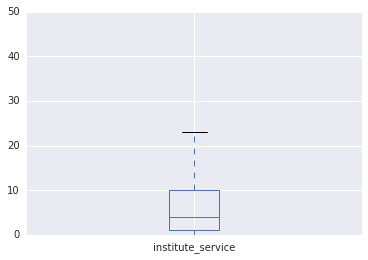

In [43]:

#check if there was outlier in combined update
combined_updated.boxplot(column = 'institute_service')

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



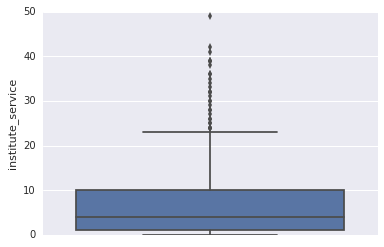

In [44]:
import seaborn as sns
sns.boxplot(y='institute_service', data=combined_updated)

In [45]:
#there was an outlier so we will use median , insteate mean
#fill nan values with median
combined_updated['institute_service'] = combined_updated['institute_service'].fillna(combined_updated['institute_service'].median())

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [46]:
#def category
def cat_service(value):
    if pd.isnull(value):
        return np.nan
    elif value < 3.0 :
        return 'New'
    elif value >= 3.0 and value < 7.0:
        return 'Experienced'
    elif value >= 7.0 and value < 11.0:
        return 'Established'
    elif value >= 11.0:
        return 'Veteran'

In [47]:
#make new column and fill it wiith category
combined_updated['service_cat'] = combined_updated['institute_service'].apply(cat_service)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
combined_updated['service_cat'].value_counts(dropna=False)

Experienced    260
New            193
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Inital Analysis

In [49]:
#check_data
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [50]:
#fill nan value with most frequently data

combined_updated = combined_updated.fillna(value = {'dissatisfied': False})


In [51]:
#check data again
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [52]:
#pivot the data
pivot = combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat')

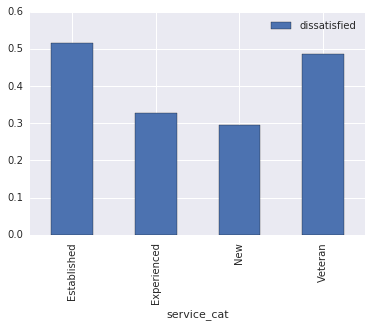

In [80]:
#visualizing the pivot
pivot.plot.bar()
plt.show()

from plot we know that, in established employee, which are work in institute between 7-11 years, more than 50 % employee who resign from their work caused by their dissatisfied with the institute.

established employee also have the highest percentage of dissatisfied employee, while the younger employee, which have less 1 year work, only 30 % people who left the institute caused by dissatistied with institute 

## analysis dissatisfaction depend on age group

#### change age columns

In [54]:
#check the data
dete_resignations_up['age'].value_counts(dropna=False)

41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
21-25            29
31-35            29
56-60            26
61 or older      23
NaN               5
20 or younger     1
Name: age, dtype: int64

In [55]:
tafe_resignations_up['CurrentAge. Current Age'].value_counts(dropna=False)

NaN              50
41  45           45
51-55            39
46  50           39
21  25           33
26  30           32
31  35           32
36  40           32
56 or older      29
20 or younger     9
Name: CurrentAge. Current Age, dtype: int64

In [56]:
#change tafe dataset age columns name

tafe_resignations_up = tafe_resignations_up.rename(columns = {'CurrentAge. Current Age':'age'})

In [57]:
#combined each dataset again

combined2 = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined_updated2 = combined2.dropna(axis=1, thresh=500)

In [58]:
combined_updated2.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


In [59]:
#cleaning the age columns

combined_updated2['age'].value_counts(dropna=False)

#because most of data have different value, we using regex to update and change that data
age_str = combined_updated2['age'].astype('str')
age_str =age_str.str.extract(r'([0-9]+)').astype('float')

#update data
combined_updated2['age'] = age_str

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [60]:
combined_updated2['age'].value_counts(dropna=False)

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age, dtype: int64

In [61]:
#fill nan value with mean
combined_updated2['age'] = combined_updated2['age'].fillna(combined_updated2['age'].mean())
combined_updated2['age'] = round(combined_updated2['age'],0)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [62]:
combined_updated2['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
39.0    55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [63]:
#group the age 
def age_group(value):
    if pd.isnull(value):
        return np.nan
    elif value < 30:
        return 'young'
    elif value >= 30 and value < 40:
        return 'adult'
    elif value >=40 and value < 50:
        return 'mature'
    elif value >= 50:
        return 'old'

In [64]:
#apply the category
combined_updated2['age_cat'] = combined_updated2['age'].apply(age_group)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [65]:
# clean dissatisfied column
combined_updated2 = combined_updated2.fillna(value = {'dissatisfied': False})

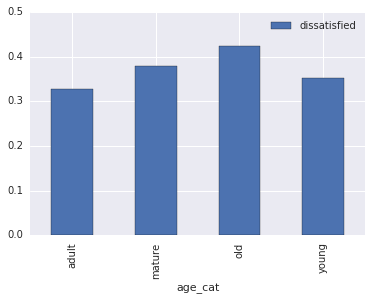

In [66]:
#visualize dissatisfied data
pivot2 = combined_updated2.pivot_table(values= 'dissatisfied', index= 'age_cat')

pivot2.plot(kind='bar', ylim =(0,0.5))

In [67]:
pivot2

,dissatisfied
age_cat,
adult,0.328042
mature,0.379310
old,0.422819
young,0.352518


In [68]:
pivot2['dissatisfied'].mean()

0.3706723626069334

if we see on age group, the biggest percentage was happen in old age group or employee who have age more than 50 years, at least 43 % old employee who left the institute caused by dissatisfied with institute, number two is mature, followed by young employee and the last is adult employee.

for this section, if we take mean from all age group, we know that only 37% from all employee in both dataset, who left the institute because they dissatistified with institute and the rest was caused by another reason

### analyze if we split tafe and date dataset

In [69]:
tafe_dissatisfied = combined_updated.loc[combined_updated['institute'] == 'TAFE',:]
dete_dissatisfied = combined_updated.loc[combined_updated['institute'] == 'DETE', :]

tafe_pivot = tafe_dissatisfied.pivot_table(values = 'dissatisfied', index = 'service_cat')
dete_pivot = dete_dissatisfied.pivot_table(values = 'dissatisfied', index = 'service_cat')

In [70]:
print('TAFE MEAN')
print(tafe_pivot.mean())
print('\n')
print('DETE MEAN')
print(dete_pivot.mean())

TAFE MEAN
dissatisfied    0.28354
dtype: float64


DETE MEAN
dissatisfied    0.489259
dtype: float64


from all mean in pivot table, we know that the percent in dete dataset is more higher than tafe dissatisfied, it's mean that people who left institute caused by dissatisfied is more higher in DETE rather TAFE dataset, this pattern maybe caused by many reason, like work habit in dete institute is more worst than in tafe

In [71]:
#combine the data again

tafe_pivot['institute'] = 'TAFE'
dete_pivot['institute'] = 'DETE'

combine_pivot = pd.concat([tafe_pivot, dete_pivot],axis=0)

In [72]:
combine_pivot

,dissatisfied,institute
service_cat,,
Established,0.333333,TAFE
Experienced,0.260274,TAFE
New,0.262774,TAFE
Veteran,0.277778,TAFE
Established,0.609756,DETE
Experienced,0.412281,DETE
New,0.375000,DETE
Veteran,0.560000,DETE


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



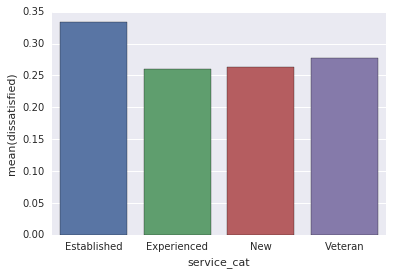

In [73]:
##visualize both tafe and dete
sns.barplot(x=tafe_pivot.index, y= tafe_pivot['dissatisfied'], data=tafe_pivot)


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



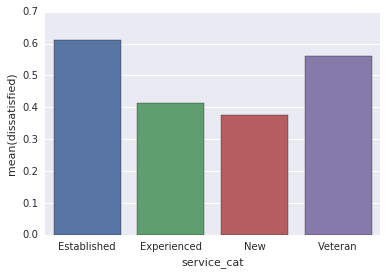

In [74]:
sns.barplot(x=dete_pivot.index, y= dete_pivot['dissatisfied'], data=dete_pivot)

there was little different between dete and tafe, the lower plot in the dete dataset is new employee while in the tafe dataset is experienced employee